<h1>             DSC8201 EXAM PART B:- Mbabazi Fiona (J24M19/009)          </h1>

DATASET DESCRIPTION (Traffic_Data.csv)
(The above dataset provides a comprehensive look at traffic data in a hypothetical urban
setting. It includes over 1.2 million records, each representing a unique snapshot of various
factors influencing traffic conditions in six fictional cities.)
List of Variables:
City: The name of the city
Vehicle type: type of vehicle in use
Weather: Weather conditions at the time of data capture
Economic Condition: Economic state of the city at time of data capture
Day of Week: The day of the week at time of data capture
Hour of Day: The hour of the day at time of data capture
Speed: Recorded speed of the vehicle
Is Peak Hour: Indicator of whether data was captured during peak traffic hours (Not peak hour:
0, Peak hour: 1)
Random Event Occurred: Indicator of whether a random event (like accidents or road closures)
occurred (No random event: 0, random event occurred: 1)
Energy consumption: An estimate of energy consumption based on vehicle type and speed
Traffic Density: The density of traffic at the time of data capture

Use the dataset to investigate a range of research objectives;
1. Understanding the traffic density on various days of the week in the urban
environments. [ 20 MARKS ]
2. Analyzing the impact of various factors like weather, economic conditions,
and vehicle types on traffic density and energy consumption. [ 10 MARKS ]
3. Developing and testing traffic density prediction algorithms for smart city
solutions. [ 10 MARKS ]

In [1]:
# Required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #A function to calculate the mean squared error, a measure of the prediction accuracy of the model.
from sklearn.ensemble import RandomForestRegressor  #A machine learning model that uses ensemble learning to make predictions.


In [2]:
# Reading the data
Trafficdata = pd.read_csv("C:/Users/fmbabazi/Downloads/Traffic_Data.csv")
Trafficdata.head(10)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,30.5179,0,0,37.5562,0.0843
6,Ecoopolis,Autonomous Vehicle,Rainy,Recession,Monday,21,43.9222,0,0,39.0420,0.0293
7,Ecoopolis,Autonomous Vehicle,Snowy,Stable,Friday,20,20.4236,0,0,18.1543,0.1393
8,MetropolisX,Drone,Snowy,Recession,Saturday,7,69.9735,0,0,41.8502,0.1505
9,SolarisVille,Drone,Snowy,Booming,Saturday,15,37.9431,0,0,18.9715,0.2485


In [3]:
#data types of each column
#Trafficdata.dtypes
Trafficdata.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [4]:
# Remove duplicate rows if any
data_new = Trafficdata.drop_duplicates()
print('Shape After deleting duplicate values:', data_new.shape)

Shape After deleting duplicate values: (1219567, 11)


In [5]:
# Generate descriptive statistics for all columns
#data_new.describe(include=object)
data_new.describe(include="all")

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567,1219567,1219567,1219567,1219567,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
unique,6,4,5,3,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Ecoopolis,Autonomous Vehicle,Solar Flare,Booming,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
freq,204179,757454,244237,406684,174783,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,NaN,NaN,NaN,NaN,NaN,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,NaN,NaN,NaN,NaN,NaN,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,NaN,NaN,NaN,NaN,NaN,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01


In [6]:
#Rechecking the missing data using the "NaN" symbol used in the dataset
missing_values = (data_new == '').sum()
missing_values

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [7]:
# Replace whitespace with NaN
data_new.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Count NaN values in each column
missing_values = data_new.isna().sum()

print(missing_values)

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64


In [8]:
Trafficdata.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [9]:
# Grouping the data by 'Day Of Week' and calculating the average traffic density for each day
traffic_density_by_day = Trafficdata.groupby('Day Of Week')['Traffic Density'].mean().sort_values()
traffic_density_by_day

Day Of Week
Thursday     0.272366
Tuesday      0.272943
Wednesday    0.273143
Monday       0.273950
Friday       0.280504
Sunday       0.283350
Saturday     0.283474
Name: Traffic Density, dtype: float64

<font color=red>1. Understanding the traffic density on various days of the week in the urban
environments. [ 20 MARKS ]</font>

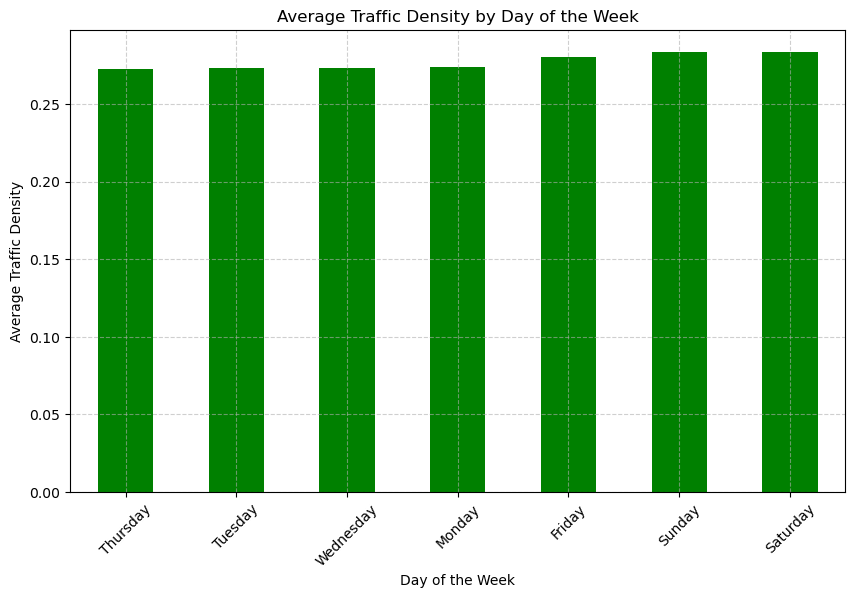

In [10]:
# Am also creating a bar chart for the average traffic density by day of the week
plt.figure(figsize=(10, 6))
traffic_density_by_day.plot(kind='bar', color='green')
plt.title('Average Traffic Density by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

From this analysis, it appears that traffic density is generally higher on the weekends, with Saturday and Sunday showing the highest average traffic densities. The weekdays show slightly lower traffic densities, with Thursday having the lowest on average.
With thisis insig, weht can help urban planners or traffic management systems better understand and anticipate traffic flow patterns across different days of the week 


<font color=red>2. Analyzing the impact of various factors like weather, economic conditions,
and vehicle types on traffic density and energy consumption. [ 10 MARKS ]</font>

<b>1. Analyzing Impact of Vehicle Type</b>

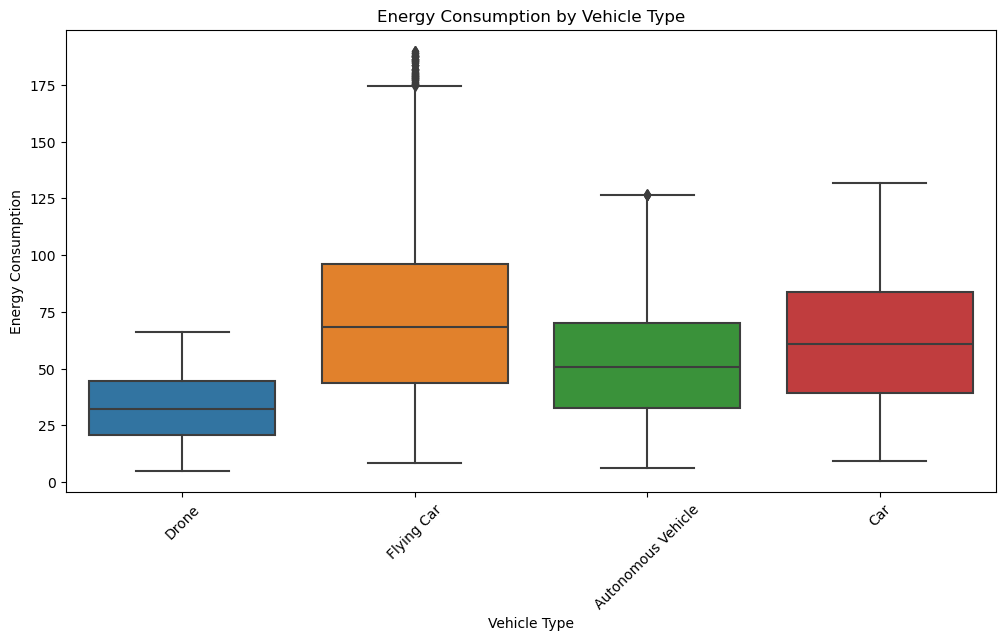

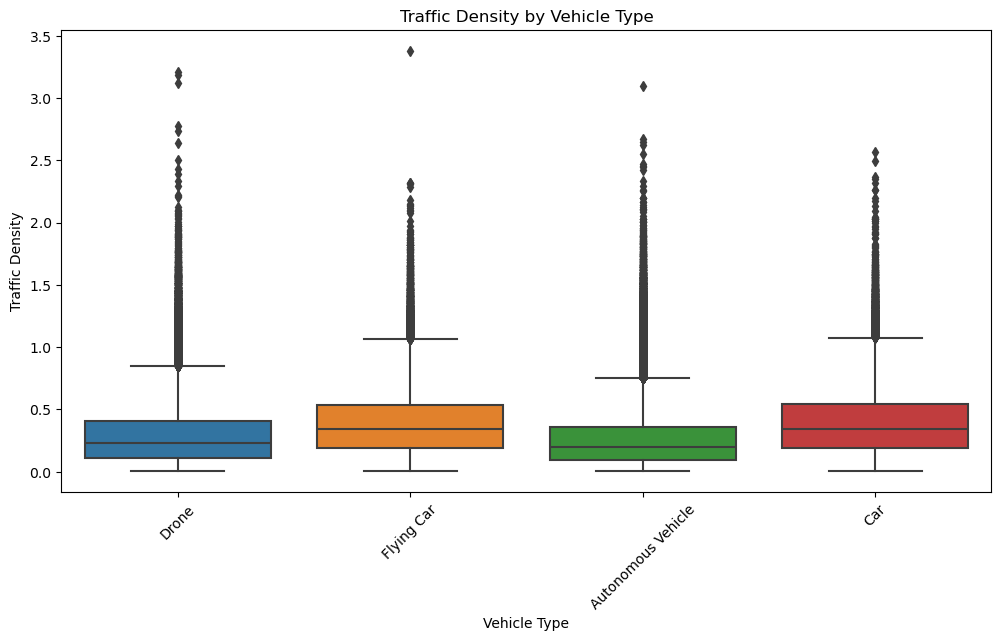

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Energy Consumption by Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Type', y='Energy Consumption', data=Trafficdata)
plt.title('Energy Consumption by Vehicle Type')
plt.xticks(rotation=45)  
plt.show()

# Boxplot for Traffic Density by Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Type', y='Traffic Density', data=Trafficdata)
plt.title('Traffic Density by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


Am  examining how different types of vehicles (like drones, flying cars, autonomous vehicles, etc.) affect energy consumption and traffic density.

<b>2. Analyzing Impact of Weather Conditions</b>

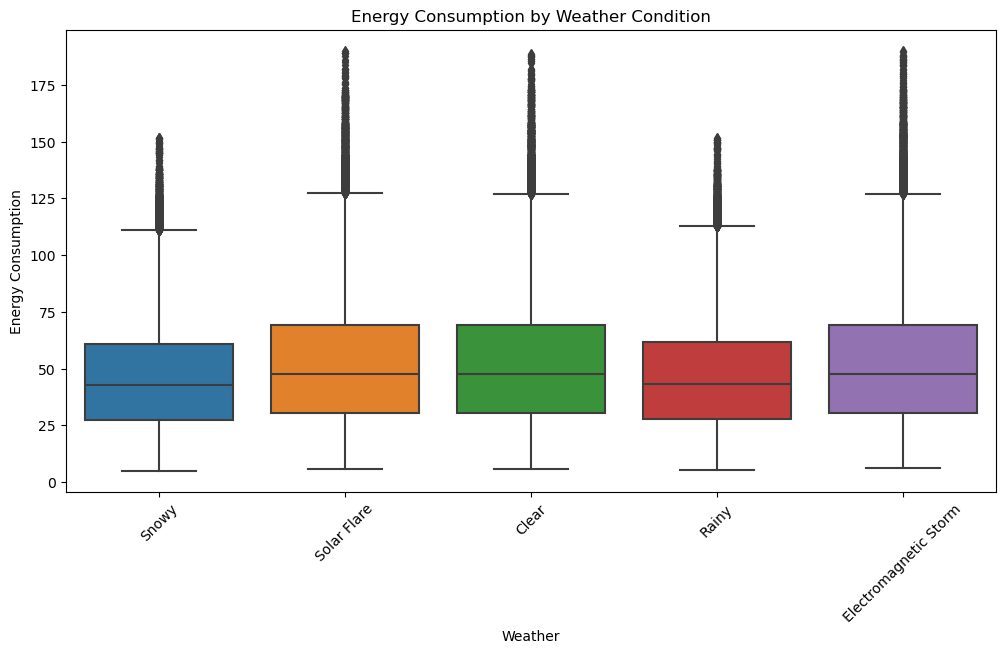

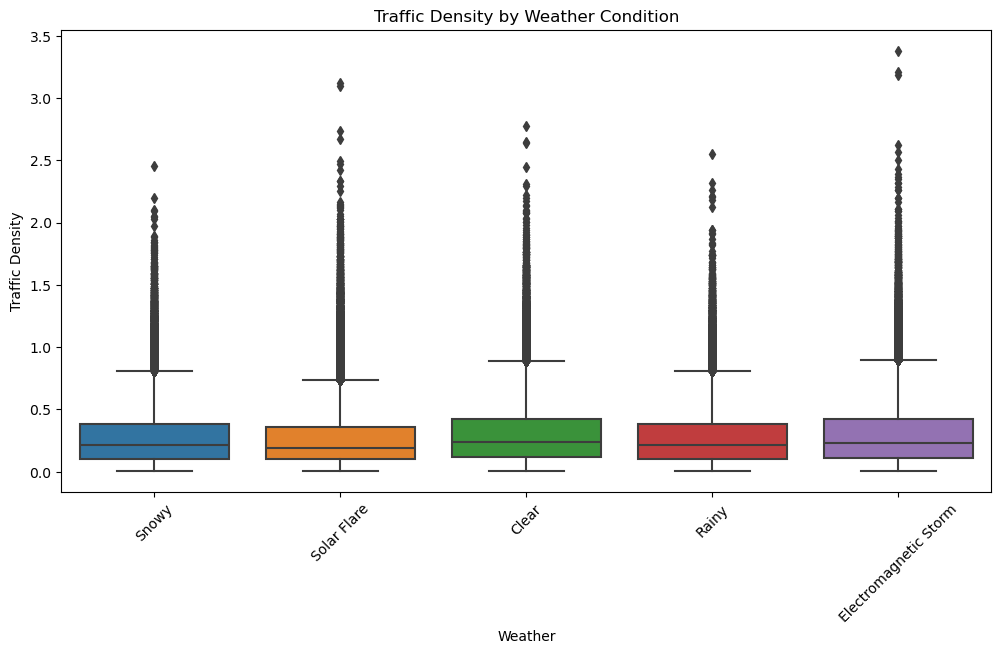

In [12]:
# Boxplot for Energy Consumption by Weather Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Energy Consumption', data=Trafficdata)
plt.title('Energy Consumption by Weather Condition')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Traffic Density by Weather Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Traffic Density', data=Trafficdata)
plt.title('Traffic Density by Weather Condition')
plt.xticks(rotation=45)
plt.show()

<b>3. Analyzing Impact of Economic Conditions</b>

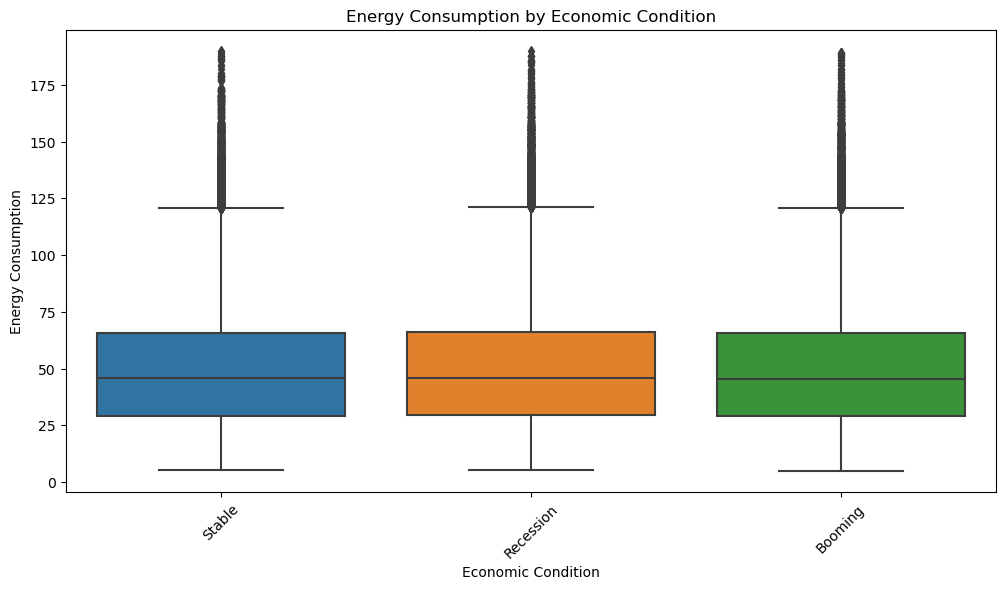

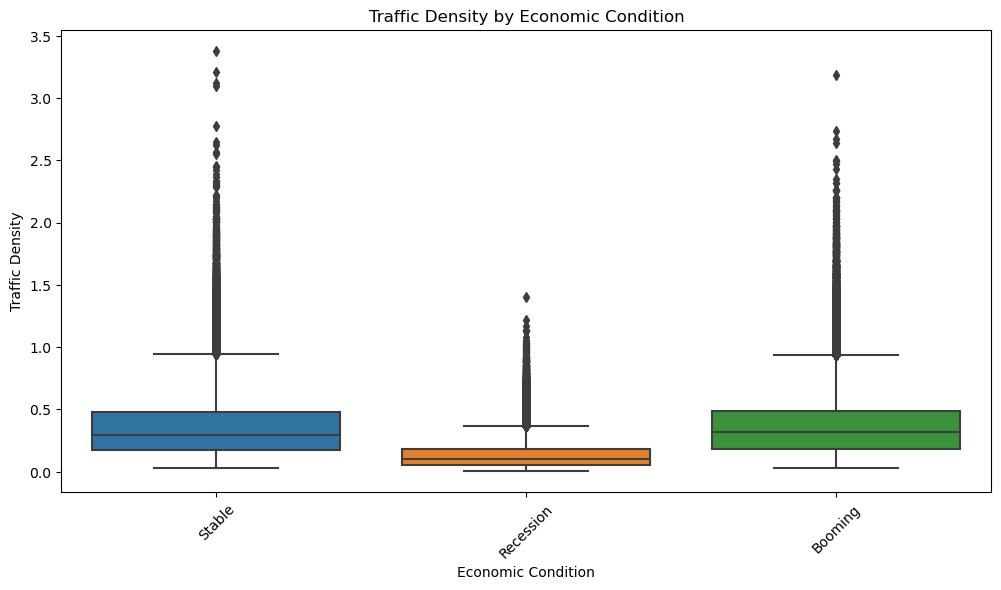

In [13]:
# Boxplot for Energy Consumption by Economic Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Economic Condition', y='Energy Consumption', data=Trafficdata)
plt.title('Energy Consumption by Economic Condition')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Traffic Density by Economic Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Economic Condition', y='Traffic Density', data=Trafficdata)
plt.title('Traffic Density by Economic Condition')
plt.xticks(rotation=45)
plt.show()

In [14]:
data_encoded = pd.get_dummies(Trafficdata)#converts categorical variable(s) into dummy/indicator variables. This is crucial because most machine learning algorithms require numerical input.

# Split the data into features and target
X = data_encoded.drop('Traffic Density', axis=1) # Features
y = data_encoded['Traffic Density']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#The dataset is split into training (80%) and testing (20%) sets.

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)#model is initialized with 100 trees
model.fit(X_train, y_train)#the model is trained using the training data.

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00968722459950897


This code is a machine learning workflow used to predict values based on given inputs. It involves data preprocessing, model training, prediction, and evaluation to assess the model's performance.  A lower MSE indicates a model that predicts more accurately.

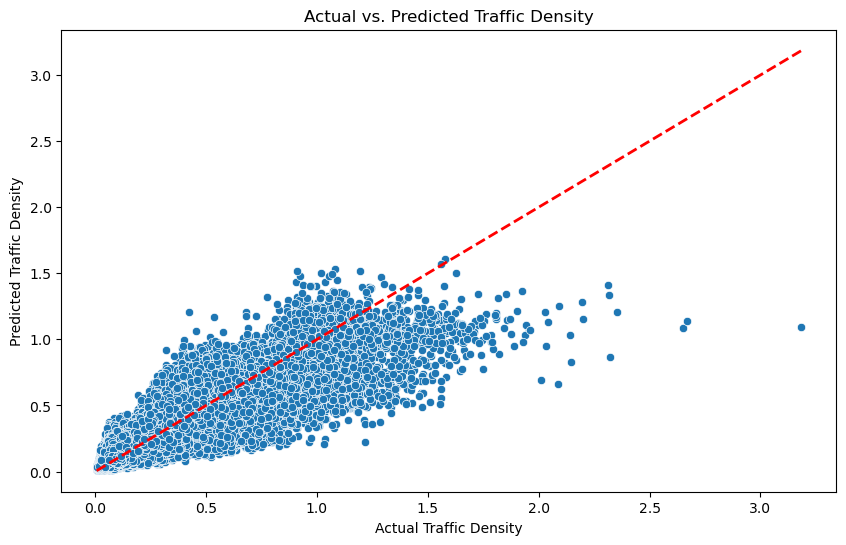

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Traffic Density')
plt.xlabel('Actual Traffic Density')
plt.ylabel('Predicted Traffic Density')

# a line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.show()

A scatter plot to compare the predicted traffic density values against the actual values
The red dashed line represents the line of perfect prediction, where the predicted values exactly match the actual values.

In [24]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

         Actual  Predicted
847212   0.1965   0.276481
760122   0.2234   0.260611
678988   0.3949   0.431965
544510   0.4116   0.550746
203363   0.0897   0.216424
...         ...        ...
624667   0.1880   0.256222
1110429  0.1922   0.157252
41351    0.3356   0.369462
13719    0.2100   0.222373
703454   0.2193   0.243684

[243914 rows x 2 columns]


In [25]:
# First, convert y_pred to a pandas Series (if it's not already) with matching index
y_pred_series = pd.Series(y_pred, index=y_test.index)

In [28]:
#Now, add the predictions to the original DataFrame
Trafficdata['Predicted Traffic Density'] = y_pred_series

In [33]:
Trafficdata.to_csv('C:/Users/fmbabazi/Downloads/data_with_predictions.csv', index=False)